##**To exlpore the Cocepts of K-means Clusetring**

###**Importing libraries and Iris Dataset**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
x

In [16]:
X= iris_df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]

##**Implementing K-means Clustering**

###**Visualize the data points of sepal length vs sepal width with K=3 clusters**

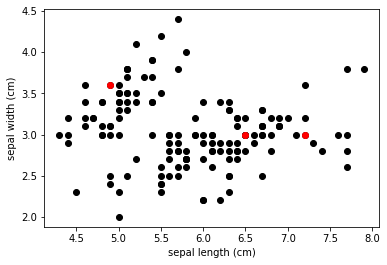

In [22]:
K=3
#print(x.dtype)
Centroids = (X.sample(n=K))
plt.scatter(X["sepal length (cm)"],X["sepal width (cm)"],c='black')
plt.scatter(Centroids["sepal length (cm)"],Centroids["sepal width (cm)"],c='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

Everytime we run following code centroids will change.So when to stop?For that we put conditions of creating centroids as follows.

Here, we are stopping the training when the centroids are not changing after two iterations. We have initially defined the diff as 1 and inside the while loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

In [24]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["sepal length (cm)"]-row_d["sepal length (cm)"])**2
            d2=(row_c["sepal width (cm)"]-row_d["sepal width (cm)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["sepal width (cm)","sepal length (cm)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['sepal width (cm)'] - Centroids['sepal width (cm)']).sum() + (Centroids_new['sepal length (cm)'] - Centroids['sepal length (cm)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["sepal width (cm)","sepal length (cm)"]]

-0.03433636478464086
0.05207582658070731
0.13647058254555589
-0.025976611108190273
-0.0598584974194738
-0.03338307582210076
-0.030778374437872458
-0.06078235693417877
-0.0014333551514447151
-0.028937198067634284
0.0


When this difference is 0 as above executed code, we will stop the training. Let’s now visualize the clusters we have got:

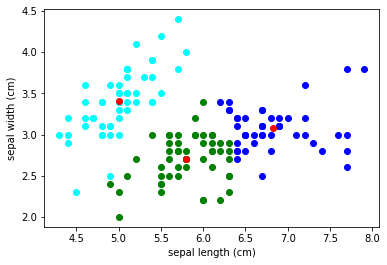

In [25]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["sepal length (cm)"],data["sepal width (cm)"],c=color[k])
plt.scatter(Centroids["sepal length (cm)"],Centroids["sepal width (cm)"],c='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

##**K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering**

Here,I have fitted multiple k-means models and in each successive model, I have increased the number of clusters. Each inertia value of the model has been save and has been plotted as shown below.

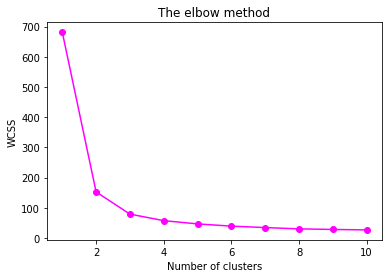

In [42]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,marker='o',c="magenta")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [32]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [34]:
frame = pd.DataFrame()
frame['Cluster count'] = y_kmeans

To get the cluster counts

In [35]:
frame['Cluster count'].value_counts()

2    62
1    50
0    38
Name: Cluster count, dtype: int64

###**Visualization of clutsers**

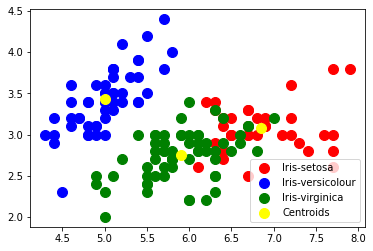

In [4]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()